In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv


In [58]:
## import necessary libraries
# !pip3 install plotly
import pandas as pd 
import numpy as np
## visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.experss as px
## Text handling libraries
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
# Reading the dataset
path = '../input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv'
df = pd.read_csv(path)

In [60]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [61]:
## To check the number of rows and columns 
df.shape

(27555, 10)

# EDA

In [62]:
## finding the null values in data 
print(df.isnull().sum())
print('Null % in each column')
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = df.shape[0]
    print('{} : {:.2f}'.format(col,null_count/total_count * 100.00))

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64
Null % in each column
index : 0.00
product : 0.00
category : 0.00
sub_category : 0.00
brand : 0.00
sale_price : 0.00
market_price : 0.00
type : 0.00
rating : 31.30
description : 0.42


In [63]:
## dropping the null values 
df = df.dropna()
df.shape

(18840, 10)

**Understanding the datatypes of columns**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18840 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         18840 non-null  int64  
 1   product       18840 non-null  object 
 2   category      18840 non-null  object 
 3   sub_category  18840 non-null  object 
 4   brand         18840 non-null  object 
 5   sale_price    18840 non-null  float64
 6   market_price  18840 non-null  float64
 7   type          18840 non-null  object 
 8   rating        18840 non-null  float64
 9   description   18840 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.6+ MB


**Univariate Analysis**

In [65]:
# univariate analysis for category column
counts = df['category'].value_counts()
count_percentange = df['category'].value_counts(1) * 100
counts_df = pd.DataFrame({'Category':counts.index , 'Counts': counts.values, 
                          'Percent':np.round(count_percentange.values,2) })
display(counts_df)

,Category,Counts,Percent
0,Beauty & Hygiene,5460,28.98
1,"Kitchen, Garden & Pets",2494,13.24
2,Snacks & Branded Foods,2468,13.10
3,Gourmet & World Food,2364,12.55
4,"Foodgrains, Oil & Masala",2173,11.53
5,Cleaning & Household,2091,11.10
6,"Bakery, Cakes & Dairy",665,3.53
7,Beverages,630,3.34
8,Baby Care,495,2.63


In [66]:
import plotly.express as px
px.bar(data_frame=counts_df,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title='Count of Items in Each Category')


In [67]:
#univariate analysis of subcategory 
counts = df['sub_category'].value_counts()
count_perc = df['sub_category'].value_counts(1)*100
counts_df = pd.DataFrame({'Sub Category': counts.index , 'Counts': counts.values,
                        'Percent':np.round(count_perc.values,2)})
print('unique sub-categories are',df['sub_category'].nunique())
print('Top 10 sub cateogry')
print(counts_df.head(10))


print('Bottom 10 sub cateogry')
print(counts_df.tail(10))

px.bar(data_frame=counts_df[:10],
 x='Sub Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title='Top 10 bought Sub Category')

unique sub-categories are 77
Top 10 sub cateogry
            Sub Category  Counts  Percent
0              Skin Care    1641     8.71
1              Hair Care     818     4.34
2       Bath & Hand Wash     808     4.29
3       Masalas & Spices     764     4.06
4  Storage & Accessories     658     3.49
5         Men's Grooming     649     3.44
6      Fragrances & Deos     627     3.33
7     Crockery & Cutlery     621     3.30
8    Ready To Cook & Eat     557     2.96
9        Organic Staples     550     2.92
Bottom 10 sub cateogry
           Sub Category  Counts  Percent
67    Flask & Casserole      39     0.21
68      Car & Shoe Care      39     0.21
69             Bakeware      37     0.20
70            Non Dairy      31     0.16
71     Baby Accessories      27     0.14
72        Bakery Snacks      24     0.13
73  Mothers & Maternity      23     0.12
74                Water      16     0.08
75       Gourmet Breads      10     0.05
76       Cuts & Sprouts       1     0.01


In [68]:
px.bar(data_frame=counts_df[-10:],
 x='Sub Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title='bottom 10 bought Sub Category')

In [69]:
# univariate analysis of brand 
#univariate analysis of subcategory 
counts = df['brand'].value_counts()
count_perc = df['brand'].value_counts(1)*100
counts_df = pd.DataFrame({'brand': counts.index , 'Counts': counts.values,
                        'Percent':np.round(count_perc.values,2)})
print('unique brand are',df['brand'].nunique())
print('Top 10 brand')
print(counts_df.head(10))
px.bar(data_frame=counts_df[:10],
 x='brand',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title='Top 10 brand')

unique brand are 1933
Top 10 brand
            brand  Counts  Percent
0        bb Royal     278     1.48
1         BB Home     172     0.91
2            Amul     153     0.81
3        Himalaya     139     0.74
4           Cello     104     0.55
5        BIOTIQUE     103     0.55
6              DP     101     0.54
7            Keya     101     0.54
8  Organic Tattva      99     0.53
9             MTR      97     0.51


In [70]:
# univariate analysis of type column
column = 'type'
count = df['type'].value_counts()
count_perc = df['type'].value_counts(1)*100
count_df = pd.DataFrame({'type':count.index, 'Count': count.values, 'Percent': np.round(count_perc.values,2)})
print('unique type are',df['type'].nunique())
print('Top 10 ' + str(column) )
print(count_df.head(10))
px.bar(data_frame=count_df[:10],
 x='type',
 y='Count',
 color='Count',
 color_continuous_scale='blues',
 text_auto=True,
 title='Top 10 type')

unique type are 358
Top 10 type
                       type  Count  Percent
0                 Face Care   1094     5.81
1          Men's Deodorants    404     2.14
2     Shampoo & Conditioner    390     2.07
3           Blended Masalas    343     1.82
4           Containers Sets    332     1.76
5      Bathing Bars & Soaps    322     1.71
6                 Glassware    263     1.40
7                 Body Care    251     1.33
8  Namkeen & Savoury Snacks    234     1.24
9    Hand Wash & Sanitizers    212     1.13


**Rating Analysis**

count    18840.000000
mean         3.943063
std          0.739646
min          1.000000
25%          3.700000
50%          4.100000
75%          4.300000
max          5.000000
Name: rating, dtype: float64


<AxesSubplot:>

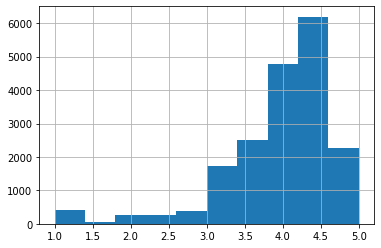

In [71]:
print(df['rating'].describe())
df['rating'].hist(bins = 10)
# this graph is right skewed most of products have higher rating 

In [72]:
# How many rating are between 0 and 1, 1 and 2 and so on 
pd.cut(df.rating,bins = [0,1,2,3,4,5]).reset_index().groupby('rating').size()

rating
(0, 1]      387
(1, 2]      335
(2, 3]     1347
(3, 4]     6559
(4, 5]    10212
dtype: int64

**Feature engineering for recommendation system**

In [73]:
df['discount'] = (df['market_price'] - df['sale_price'])*100/(df['market_price'])
print(df['discount'].describe())
pd.cut(df.discount, bins = [-1,0,10,20,30,40,50,60,70,80,90,100]).reset_index().groupby('discount').size()

count    18840.000000
mean        11.751733
std         14.546937
min          0.000000
25%          0.000000
50%          5.000000
75%         20.000000
max         82.506266
Name: discount, dtype: float64


discount
(-1, 0]      8157
(0, 10]      3125
(10, 20]     2962
(20, 30]     2435
(30, 40]     1126
(40, 50]      700
(50, 60]      223
(60, 70]       76
(70, 80]       32
(80, 90]        4
(90, 100]       0
dtype: int64

<AxesSubplot:>

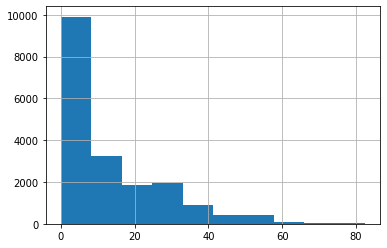

In [74]:
df['discount'].hist(bins = 10)

# Bivariate Analysis

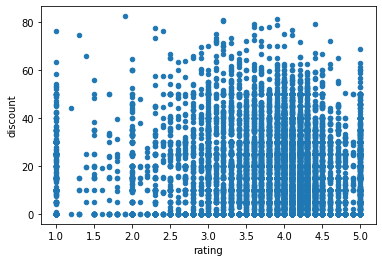

In [75]:
# is there any relation between discount and rating
ax = df.plot.scatter(x = 'rating', y = 'discount' )

In [82]:
df2 = df.copy()
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split('& |, ', a)))

In [83]:
for col in ['category','sub_category','type']:
    df2[col] = df2[col].apply(get_list)

In [87]:
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
for col in ['category', 'sub_category', 'type','brand']:
    df2[col] = df2[col].apply(cleaner)
def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])
df2['product_classification_features'] = df2.apply(couple, axis=1)

In [ ]:
def recommend_most_popular(col,col_value,top_n=5):
    return df[df[col]==col_value].sort_values(by='rating',ascending = False).head(top_n)[['product',col,'rating']]

In [79]:
## most popular products of category beauty & hygiene
recommend_most_popular(col='category',col_value='Beauty & Hygiene')

,product,category,rating
20163,Supreme Scalp Rejuvenation Shampoo,Beauty & Hygiene,5.0
5471,Vitamin C Brightening Day Cream With SPF 30 UV...,Beauty & Hygiene,5.0
20935,Exfoliating Face Scrub,Beauty & Hygiene,5.0
5498,Prickly Heat Powder - Cool Chandan With Sandal...,Beauty & Hygiene,5.0
20859,Wheat Grass Powder,Beauty & Hygiene,5.0


In [80]:
# Let’s look at the most popular products for sub_category = Hair Care
recommend_most_popular(col = 'sub_category', col_value = 'Hair Care')

,product,sub_category,rating
14616,Black Pearl Shampoo - Hair Loss & Dandruff Con...,Hair Care,5.0
8274,"De-Tangling Comb - 1 Row, 1266",Hair Care,5.0
14555,Argan Oil Shampoo,Hair Care,5.0
14440,Blooming Colour Shampoo - Murumuru Butter & Ro...,Hair Care,5.0
13069,Hair Repair Conditioner,Hair Care,5.0


In [84]:
# Let’s look at the most popular products for the brand = Amul
recommend_most_popular(col = 'brand', col_value = 'Amul')

,product,brand,rating
16466,Vanilla Milkshake,Amul,5.0
10430,Spray Infant Milk Food/Substitute,Amul,4.5
5856,Almondo - Roasted Almonds Coated With Milk Cho...,Amul,4.5
9399,Amulya Dairy Whitener,Amul,4.4
20841,"Peru Dark Amazon, Single Origin Dark Chocolate...",Amul,4.4


In [85]:
# Let’s look at the most popular products for type = Face Care
recommend_most_popular(col = 'type', col_value = 'Face Care')

,product,type,rating
16905,Nutritivo Pomegranate Radiant Glow Firming Serum,Face Care,5.0
25346,Hydro Replenish Refreshing Face Mist,Face Care,5.0
9285,Bio Morning Nectar Flawless Skin Cream,Face Care,5.0
3355,Total Effects Whip - UV SPF 30,Face Care,5.0
3368,Organic Shield - Anti Tan Facial Kit,Face Care,5.0


In [96]:
df2.product_classification_features.head()

0    beauty hygiene haircare srisriayurveda hairoil...
1    kitchen garden pets storage accessories master...
2       cleaning household poojaneeds trm lamp lampoil
3    cleaning household bins bathroomware nakoda la...
4    beauty hygiene bath handwash nivea bathingbars...
Name: product_classification_features, dtype: object

**Let’s calculate the cosine similarity of the product_classification_features for all the products.**

In [94]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['product_classification_features'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim)
cosine_sim_df.shape

(18840, 18840)

**The above matrix contains the cosine similarity of each product vs the rest of the products in catalog. Let’s build a recommender using cosine similarity**



In [97]:
def content_recommendation_v1(title):
    a = df2.copy().reset_index().drop('index',axis=1)
    index = a[a['product']==title].index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['product']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index]
    return similar_df

In [98]:
# Let’s see the recommendations for a few products.
title = 'Water Bottle - Orange'
content_recommendation_v1(title)

,product,cosine_similarity
109,Glass Water Bottle - Aquaria Organic Purple,0.875
705,Glass Water Bottle With Round Base - Transpare...,0.875
1155,H2O Unbreakable Water Bottle - Pink,0.875
1500,Water Bottle H2O Purple,0.875
1828,H2O Unbreakable Water Bottle - Green,0.875
1976,Regel Tritan Plastic Sports Water Bottle - Black,0.875
2182,Apsara 1 Water Bottle - Assorted Colour,0.875
2361,"Glass Water Bottle With Round Base - Yellow, B...",0.875
2485,Trendy Stainless Steel Bottle With Steel Cap -...,0.875


In [99]:
# recommendation for product dark chocolate - 55% rich in cocoa
title = 'Dark Chocolate- 55% Rich In Cocoa'
content_recommendation_v1(title)

,product,cosine_similarity
105,I Love You Fruit N Nut Chocolate,1.0
1144,Choco Cracker - Magical Crystal With Milk Choc...,1.0
1718,"Dark Chocolate - Single Origin, India",1.0
2517,"Fruit N Nut, Dark Chocolate- 55% Rich In Cocoa",1.0
3117,"Colombia Classique Black, Single Origin Dark C...",1.0
3167,Dark Chocolate,1.0
4013,Almondo - Roasted Almonds Coated With Milk Cho...,1.0
4358,Sugar Free Dark Chocolate,1.0
5867,Milk Compound Slab - MCO-11,1.0


**In this example, we can recommend all types of Chocolates.
However, the top recommendation should be dark chocolate.**

# Improving the Model


In [104]:
# let's use the product column as well to create another cosine similarity 
count2 = CountVectorizer(stop_words = 'english', lowercase = True)
count_matrix2 = count2.fit_transform(df2['product'])
cosine_sim2 = cosine_similarity(count_matrix2, count_matrix2)
cosine_sim_df2 = pd.DataFrame(cosine_sim2)
def content_recommendation_v2(title):
    a = df2.copy().reset_index().drop('index',axis=1)
    index = a[a['product']==title].index[0]
    similar_basis_metric_1 = cosine_sim_df[cosine_sim_df[index]>0][index].reset_index().rename(columns={index:'sim_1'})
    similar_basis_metric_2 = cosine_sim_df2[cosine_sim_df2[index]>0][index].reset_index().rename(columns={index:'sim_2'})
    similar_df = similar_basis_metric_1.merge(similar_basis_metric_2,how='left').merge(a[['product']].reset_index(),how='left')
    similar_df['sim'] = similar_df[['sim_1','sim_2']].fillna(0).mean(axis=1)
    similar_df = similar_df[similar_df['index']!=index].sort_values(by='sim',ascending=False)
    return similar_df[['product','sim']].head(10)
title = 'Water Bottle - Orange'
content_recommendation_v2(title)

,product,sim
669,Sante Infuser Water Bottle - Orange,0.824798
2024,H2o Unbreakable Water Bottle - Orange,0.824798
2565,Swat Pet Water Bottle - Orange,0.824798
1912,Glass Water Bottle - Circo Orange & Lemon,0.791053
2084,Spray Glass water Bottle With Cork - Orange,0.791053
1924,Sip-It-Plastic Water Bottle,0.726175
1997,"Water Bottle - Twisty, Pink",0.726175
1290,Plastic Water Bottle - Pink,0.726175
195,Water Bottle H2O Purple,0.726175
1863,Water Bottle - Apsara 1 Assorted Colour,0.695699
